
# Ledoit-Wolf vs OAS estimation

The usual covariance maximum likelihood estimate can be regularized
using shrinkage. Ledoit and Wolf proposed a close formula to compute
the asymptotically optimal shrinkage parameter (minimizing a MSE
criterion), yielding the Ledoit-Wolf covariance estimate.

Chen et al. proposed an improvement of the Ledoit-Wolf shrinkage
parameter, the OAS coefficient, whose convergence is significantly
better under the assumption that the data are Gaussian.

This example, inspired from Chen's publication [1], shows a comparison
of the estimated MSE of the LW and OAS methods, using Gaussian
distributed data.

[1] "Shrinkage Algorithms for MMSE Covariance Estimation"
Chen et al., IEEE Trans. on Sign. Proc., Volume 58, Issue 10, October 2010.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import cholesky, toeplitz

from sklearn.covariance import OAS, LedoitWolf

np.random.seed(0)

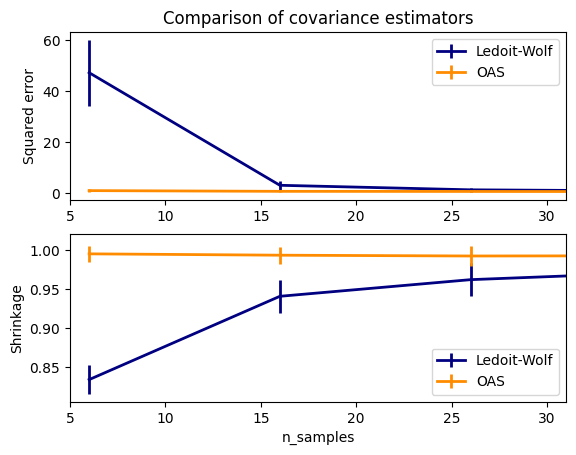

In [4]:
n_features = 100
# simulation covariance matrix (AR(1) process)
r = 0.05
real_cov = toeplitz(r ** np.arange(n_features))
coloring_matrix = cholesky(real_cov)

n_samples_range = np.arange(6, 300, 10)
repeat = 100
lw_mse = np.zeros((n_samples_range.size, repeat))
oa_mse = np.zeros((n_samples_range.size, repeat))
lw_shrinkage = np.zeros((n_samples_range.size, repeat))
oa_shrinkage = np.zeros((n_samples_range.size, repeat))
for i, n_samples in enumerate(n_samples_range):
    for j in range(repeat):
        X = np.dot(np.random.normal(size=(n_samples, n_features)), coloring_matrix.T)

        lw = LedoitWolf(store_precision=False, assume_centered=True)
        lw.fit(X)
        lw_mse[i, j] = lw.error_norm(real_cov, scaling=False)
        lw_shrinkage[i, j] = lw.shrinkage_

        oa = OAS(store_precision=False, assume_centered=True)
        oa.fit(X)
        oa_mse[i, j] = oa.error_norm(real_cov, scaling=False)
        oa_shrinkage[i, j] = oa.shrinkage_

# plot MSE
plt.subplot(2, 1, 1)
plt.errorbar(
    n_samples_range,
    lw_mse.mean(1),
    yerr=lw_mse.std(1),
    label="Ledoit-Wolf",
    color="navy",
    lw=2,
)
plt.errorbar(
    n_samples_range,
    oa_mse.mean(1),
    yerr=oa_mse.std(1),
    label="OAS",
    color="darkorange",
    lw=2,
)
plt.ylabel("Squared error")
plt.legend(loc="upper right")
plt.title("Comparison of covariance estimators")
plt.xlim(5, 31)

# plot shrinkage coefficient
plt.subplot(2, 1, 2)
plt.errorbar(
    n_samples_range,
    lw_shrinkage.mean(1),
    yerr=lw_shrinkage.std(1),
    label="Ledoit-Wolf",
    color="navy",
    lw=2,
)
plt.errorbar(
    n_samples_range,
    oa_shrinkage.mean(1),
    yerr=oa_shrinkage.std(1),
    label="OAS",
    color="darkorange",
    lw=2,
)
plt.xlabel("n_samples")
plt.ylabel("Shrinkage")
plt.legend(loc="lower right")
plt.ylim(plt.ylim()[0], 1.0 + (plt.ylim()[1] - plt.ylim()[0]) / 10.0)
plt.xlim(5, 31)

plt.show()

The graph compares two covariance estimators: Ledoit-Wolf (LW) and Oracle Approximating Shrinkage (OAS). These estimators are used to estimate the covariance matrix of a dataset, which is crucial in various multivariate statistical analyses.

### Mathematical Differences

#### Ledoit-Wolf (LW) Estimator
The Ledoit-Wolf estimator shrinks the empirical covariance matrix $S$ towards a well-conditioned target, often the identity matrix, to improve the estimation. The estimator is defined as:

$$
\Sigma_{\text{LW}} = \lambda T + (1 - \lambda) S
$$

where:
- $T$ is the target matrix (usually the identity matrix scaled by the average eigenvalue of $S$).
- $S$ is the empirical covariance matrix.
- $\lambda$ is the shrinkage parameter calculated to minimize the mean squared error between $\Sigma_{\text{LW}}$ and the true covariance matrix.

The Ledoit-Wolf estimator aims to reduce the estimation error by finding an optimal balance between $S$ and $T$.

#### Oracle Approximating Shrinkage (OAS) Estimator
The OAS estimator also shrinks the empirical covariance matrix towards a target, similar to Ledoit-Wolf, but it uses a different approach to calculate the shrinkage parameter. The OAS estimator is defined as:

$$
\Sigma_{\text{OAS}} = \alpha T + (1 - \alpha) S
$$

where:
- $T$ is the target matrix (identity matrix scaled by the average eigenvalue of $S$).
- $S$ is the empirical covariance matrix.
- $\alpha$ is the shrinkage parameter calculated to minimize the Frobenius norm of the difference between $\Sigma_{\text{OAS}}$ and the true covariance matrix.

The key difference is in the calculation of the shrinkage parameter, where OAS provides a closed-form solution under the assumption of normality, leading to potentially better performance with smaller sample sizes.

### Interpretation of the Graph

#### Squared Error (Top Plot)
The top plot shows the squared error of the covariance estimators as the number of samples ($n_{\text{samples}}$) increases. We observe that:
- The Ledoit-Wolf estimator (blue line) starts with a higher squared error for very small sample sizes, but the error decreases significantly as the sample size increases, converging towards zero.
- The OAS estimator (orange line) maintains a consistently low squared error across all sample sizes, indicating stable performance even with fewer samples.

This suggests that while Ledoit-Wolf improves significantly with more data, OAS is more robust with smaller sample sizes.

#### Shrinkage (Bottom Plot)
The bottom plot shows the shrinkage parameter for both estimators as the number of samples increases. We observe that:
- The Ledoit-Wolf estimator (blue line) starts with a lower shrinkage value and increases as the sample size grows, indicating that it relies more on the empirical covariance matrix with more data.
- The OAS estimator (orange line) maintains a relatively stable shrinkage value, close to 1, across all sample sizes.

This indicates that OAS consistently applies a higher level of shrinkage, making it less sensitive to sample size variations, whereas Ledoit-Wolf adapts its shrinkage based on the sample size, leading to better performance with more data.

### Conclusion
- **Ledoit-Wolf**: Better for larger sample sizes due to its adaptive shrinkage parameter, leading to lower squared error with sufficient data.
- **OAS**: More robust for smaller sample sizes, maintaining low squared error and stable shrinkage, making it a reliable choice when data is limited.

The choice between Ledoit-Wolf and OAS depends on the sample size and the specific requirements of the analysis.
